In [1]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('crop_production.csv')

In [9]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [10]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [11]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [13]:
df.shape

(246091, 7)

In [18]:
df.iloc[:,2:4]

,Crop_Year,Season
0,2000,Kharif
1,2000,Kharif
2,2000,Kharif
3,2000,Whole Year
4,2000,Whole Year
...,...,...
246086,2014,Summer
246087,2014,Summer
246088,2014,Whole Year
246089,2014,Winter


In [19]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [22]:
df['Production'].values

array([2.00000e+03, 1.00000e+00, 3.21000e+02, ..., 1.62500e+04,
       5.97899e+05, 8.80000e+01])

In [24]:
df['Production'].mean()

582503.4422509808

In [25]:
df['Production'].median()

729.0

In [29]:
df['Area'].mode

<bound method Series.mode of 0           1254.0
1              2.0
2            102.0
3            176.0
4            720.0
            ...   
246086       306.0
246087       627.0
246088       324.0
246089    279151.0
246090       175.0
Name: Area, Length: 246091, dtype: float64>

In [30]:
df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

<AxesSubplot:xlabel='Production'>

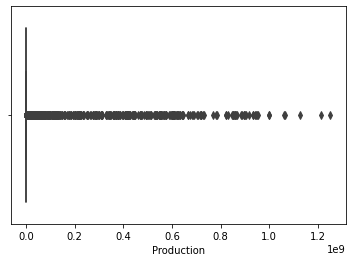

In [33]:
import seaborn as sns
sns.boxplot(x=df['Production'])

In [34]:
df.Production.replace(0,df.Production.mean(),inplace=True)

In [37]:
lowerLimit=df['Production'].quantile(0.25)
upperLimit=df['Production'].quantile(0.75)
df= df[(df['Production']>lowerLimit)&(df['Production']<upperLimit)]
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.00
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84
...,...,...,...,...,...,...,...
246074,West Bengal,PURULIA,2014,Rabi,Horse-gram,660.0,332.00
246081,West Bengal,PURULIA,2014,Rabi,Rapeseed &Mustard,1885.0,1508.00
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.00
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.00


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

labels=label_encoder.fit_transform(df.Season)

#appending the labels to the DataFrame
df['Season']=labels
df['Season'].value_counts()

1    23014
2    17399
4    12732
3     4106
5      968
0      967
Name: Season, dtype: int64